## Practical-15: Write a program to solve XOR problem using RBF Network. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:

# Define utility functions

# Compute the radial basis function Φ1.
def Φ1(x):
    return np.exp(-np.linalg.norm(x - np.array([1, 1]))**2)

# Compute the radial basis function Φ2.
def Φ2(x):
    return np.exp(-np.linalg.norm(x - np.array([0, 0]))**2)

# Compute the output of the radial basis function network.
def rbf_network(x):
    return Φ1(x) - Φ2(x)

# Define input data and labels for XOR problem
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

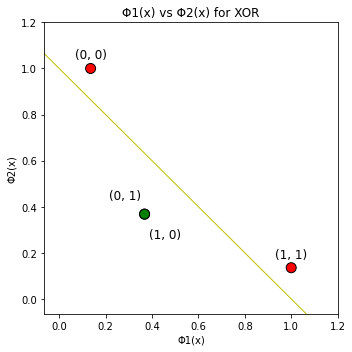

In [5]:
# Plotting

plt.figure(figsize=(5, 5))
Φ1_values = [Φ1(x) for x in X]
Φ2_values = [Φ2(x) for x in X]

# Scatter plot of data points
colors = ['red' if target == 0 else 'green' for target in y]
plt.scatter(Φ1_values, Φ2_values, c=colors, edgecolors='k', s=100, label='Data Points')

# Contour plot for the decision boundary
x_range = np.linspace(min(Φ1_values) - 0.2, max(Φ1_values) + 0.2, 100)
y_range = np.linspace(min(Φ2_values) - 0.2, max(Φ2_values) + 0.2, 100)
X_range, Y_range = np.meshgrid(x_range, y_range)
Z = np.zeros_like(X_range)

# Calculate RBF network output for each point in the meshgrid
for i in range(X_range.shape[0]):
    for j in range(X_range.shape[1]):
        Z[i, j] = rbf_network(np.array([X_range[i, j], Y_range[i, j]]))

# Plot the contour of the decision boundary
plt.contour(X_range, Y_range, Z, levels=[0], linewidths=1, colors='y')

for i, point in enumerate(X):
    xytext = (-20, 15) if np.array_equal(point, [0, 1]) else (20, -24) if np.array_equal(point, [1, 0]) else (0, 10)
    plt.annotate(f'({point[0]}, {point[1]})', (Φ1_values[i], Φ2_values[i]), textcoords="offset points", xytext=xytext, ha='center', fontsize=12)

plt.title('Φ1(x) vs Φ2(x) for XOR')
plt.xlabel('Φ1(x)')
plt.ylabel('Φ2(x)')

plt.tight_layout()
plt.show()